In [22]:
import pandas as pd
import numpy as np
import os

import acquire
import prepare
import explore
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from scipy import stats
from sklearn.model_selection import train_test_split

from datetime import date, datetime
from explore import train_validate_test_split, freq_table

# Rail Equipment

## Acquire

In [2]:
df = acquire.get_equiprail()
df.shape

(22402, 146)

In [3]:
df.head()

,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,IMO3,...,RCL,Latitude,Longitud,SIGNAL,MOPERA,ADJUNCT1,ADJUNCT2,ADJUNCT3,SUBDIV,Unnamed: 145
0,12,5,BNSF,GC0512102,NaN,NaN,NaN,NaN,12,5,...,0.0,29.755900,-95.293100,1,1,G,NaN,NaN,NORTH SHORE,NaN
1,12,5,BNSF,GC0512105,NaN,NaN,NaN,NaN,12,5,...,0.0,29.500571,-95.597089,2,5,Z,NaN,NaN,GALVESTON,NaN
2,12,2,NS,98074,12.0,2.0,CSX,100906,12,2,...,NaN,34.612981,-86.988133,1,1,B,NaN,NaN,ALABAMA,NaN
3,12,5,BNSF,GC0512106,NaN,NaN,NaN,NaN,12,5,...,0.0,31.446576,-96.207606,2,5,Z,NaN,NaN,HOUSTON,NaN
4,12,5,BNSF,GC0512112,NaN,NaN,NaN,NaN,12,5,...,0.0,29.772155,-95.384013,2,5,Z,NaN,NaN,HOUSTON,NaN


## Prepare

In [4]:
df = prepare.prep_equip_df(df)

In [5]:
df.shape

(11504, 33)

In [6]:
df.head()

,railroad_company,accident_type,state,temp,visibility,weather,train_speed,train_direction,train_weight,train_type,...,engineers_onduty,conductors_onduty,brakemen_onduty,region,typrr,lat,long,signal_type,date,season
incdtno,,,,,,,,,,,,,,,,,,,,,
GC0512102,BNSF,1,48,84,2,1,10,2.0,9811,1,...,1.0,1.0,0.0,5,1,29.7559,-95.2931,1,2012-05-05 08:00:00,Spring
GC0512105,BNSF,1,48,70,4,3,5,2.0,17157,1,...,1.0,1.0,0.0,5,1,29.500571,-95.597089,2,2012-05-11 02:25:00,Spring
GC0512106,BNSF,1,48,84,2,1,3,2.0,17304,1,...,1.0,1.0,0.0,5,1,31.446576,-96.20760600000001,2,2012-05-16 15:40:00,Spring
GC0512112,BNSF,1,48,70,4,1,5,3.0,14212,1,...,1.0,1.0,0.0,5,1,29.772154999999998,-95.384013,2,2012-05-31 03:36:00,Spring
GC0912118,BNSF,1,48,78,2,3,8,1.0,5918,1,...,1.0,1.0,0.0,5,1,29.606296999999998,-95.300054,2,2012-09-29 14:10:00,Fall


In [7]:
df.columns

Index(['railroad_company', 'accident_type', 'state', 'temp', 'visibility',
       'weather', 'train_speed', 'train_direction', 'train_weight',
       'train_type', 'track_type', 'front_engines', 'loadfrght_cars',
       'loadpass_cars', 'emptyfrght_cars', 'emptypass_cars', 'equip_damage',
       'track_damage', 'cause', 'total_killed', 'total_injured', 'max_speed',
       'total_damage', 'engineers_onduty', 'conductors_onduty',
       'brakemen_onduty', 'region', 'typrr', 'lat', 'long', 'signal_type',
       'date', 'season'],
      dtype='object')

In [8]:
df.state.value_counts()

48    1631
17     872
6      823
31     549
13     396
39     383
20     381
29     374
42     373
1      303
18     300
22     295
19     294
27     293
47     275
40     262
53     258
8      255
5      253
56     238
51     233
36     187
37     178
41     158
4      144
35     142
12     140
49     139
21     138
30     133
24     127
45     126
55     116
54     109
16     105
38      99
32      67
28      56
34      55
26      49
46      44
11      41
25      38
10      31
9       24
44       8
33       5
50       3
23       1
Name: state, dtype: int64

In [9]:
df.dtypes

railroad_company             object
accident_type                 int64
state                         int64
temp                          int64
visibility                    int64
weather                       int64
train_speed                   int64
train_direction             float64
train_weight                  int64
train_type                   object
track_type                    int64
front_engines                 int64
loadfrght_cars                int64
loadpass_cars                 int64
emptyfrght_cars               int64
emptypass_cars                int64
equip_damage                  int64
track_damage                  int64
cause                        object
total_killed                  int64
total_injured                 int64
max_speed                     int64
total_damage                  int64
engineers_onduty            float64
conductors_onduty           float64
brakemen_onduty             float64
region                        int64
typrr                       

# Highway Rail

## Acquire

In [10]:
hwy_df = acquire.get_hwyrail()
hwy_df.head()

,AMTRAK,IYR,IMO,RAILROAD,INCDTNO,IYR2,IMO2,RR2,INCDTNO2,IYR3,...,NARR1,NARR2,NARR3,NARR4,NARR5,SUBDIV,ROADCOND,VIDEOT,VIDEOU,Unnamed: 103
0,NaN,12,3,UP,0312RS009,NaN,NaN,,,12.0,...,HIEHWAY USER'S ACTIONS: STOPPED ON CROSSING ( ...,NaN,NaN,NaN,NaN,WOODBRIDGE,B,1,2,NaN
1,NaN,12,3,UP,0312RS025,NaN,NaN,,,12.0,...,HIGHWAY USER'S ACTIONS: STOPPED ON CROSSING ( ...,D LEFT THE SCENE.,NaN,NaN,NaN,FRESNO SUB,A,1,2,NaN
2,NaN,12,10,BNSF,CA1012201,NaN,NaN,,,12.0,...,DRIVER AGE UNKNOW. 41: ABANDONED VEHICLE,NaN,NaN,NaN,NaN,SAN BERNARDINO,A,1,2,NaN
3,NaN,12,10,BNSF,CA1012202,NaN,NaN,,,12.0,...,12/18/12 PER CONTRA COSTA COUNTY CORONERS REPO...,NaN,NaN,NaN,NaN,STOCKTON,A,1,1,NaN
4,NaN,12,7,BNSF,CA0712201,NaN,NaN,,,12.0,...,NaN,NaN,NaN,NaN,NaN,STOCKTON,A,1,2,NaN


## Prepare

In [11]:
hwy_df = prepare.prep_hwy_df(hwy_df)
hwy_df.shape

(12181, 49)

In [12]:
hwy_df.head()

,railroad_company,station,county,state,region,city,vehicle_speed,vehicle_type,vehicle_direction,position,...,train_occupants,user_killed,user_injured,rail_killed,rail_injured,train_pass_killed,train_pass_injured,road_condtions,date,season
incdtno,,,,,,,,,,,,,,,,,,,,,
0312RS009,UP,WOODBRIDGE,SAN JOAQUIN,6,7,LODI,0.0,A,4,2,...,3,0,0,0,0,0,0,B,2012-03-16 09:15:00,Spring
0312RS025,UP,ACAMPO,SAN JOAQUIN,6,7,,0.0,A,4,2,...,2,0,0,0,0,0,0,A,2012-03-30 21:35:00,Spring
CA1012201,BNSF,LOS NIETOS,LOS ANGELES,6,7,SANTA FE SPRINGS,0.0,A,1,2,...,3,0,0,0,0,0,0,A,2012-10-07 20:25:00,Fall
CA0712201,BNSF,FRESNO,FRESNO,6,7,FRESNO,0.0,A,1,2,...,2,0,1,0,0,0,0,A,2012-07-28 20:55:00,Summer
0612RS011,UP,BAKERSFIELD,KERN,6,7,,50.0,C,4,3,...,3,0,0,0,0,0,0,A,2012-06-18 15:58:00,Summer


In [13]:
hwy_df.columns

Index(['railroad_company', 'station', 'county', 'state', 'region', 'city',
       'vehicle_speed', 'vehicle_type', 'vehicle_direction', 'position',
       'accident_type', 'hazmat_entity', 'temp', 'visibility', 'weather',
       'train_type', 'track_type', 'front_engines', 'railcar_quantity',
       'train_speed', 'train_direction', 'warning_location', 'warning_signal',
       'lights', 'standveh', 'other_train', 'motorist_action',
       'view_obstruction', 'vehicle_damage', 'driver_fate', 'vehicle_occupied',
       'total_killed', 'total_injured', 'vehicle_occupants',
       'ispublic_crossing', 'fips', 'whistle_ban', 'driver_age',
       'driver_gender', 'train_occupants', 'user_killed', 'user_injured',
       'rail_killed', 'rail_injured', 'train_pass_killed',
       'train_pass_injured', 'road_condtions', 'date', 'season'],
      dtype='object')

In [16]:
hwy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12181 entries, 0312RS009 to 193825
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   railroad_company    12181 non-null  object        
 1   station             12181 non-null  object        
 2   county              12181 non-null  object        
 3   state               12181 non-null  int64         
 4   region              12181 non-null  int64         
 5   city                12181 non-null  object        
 6   vehicle_speed       12181 non-null  float64       
 7   vehicle_type        12181 non-null  object        
 8   vehicle_direction   12181 non-null  object        
 9   position            12181 non-null  object        
 10  accident_type       12181 non-null  int64         
 11  hazmat_entity       12181 non-null  object        
 12  temp                12181 non-null  int64         
 13  visibility          12181 non-null  int64 

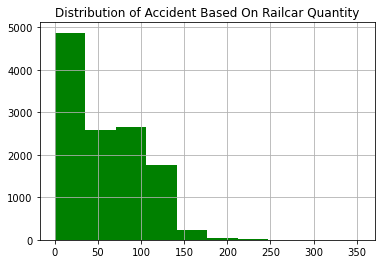

In [21]:
hwy_df['railcar_quantity'].hist(color='green')

plt.title('Distribution of Accident Based On Railcar Quantity')
plt.show()

<AxesSubplot:xlabel='railcar_quantity'>

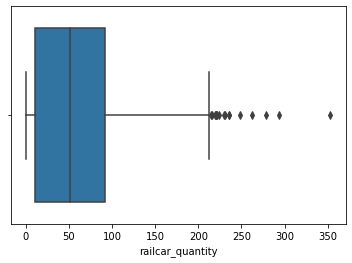

In [20]:
sns.boxplot(data=hwy_df, x = 'railcar_quantity')

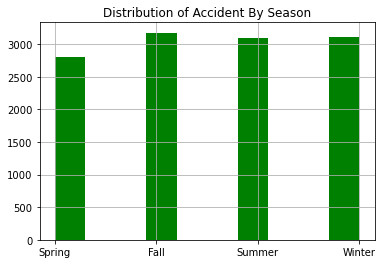

In [24]:
hwy_df['season'].hist(color='green')

plt.title('Distribution of Accident By Season')
plt.show()